<a href="https://colab.research.google.com/github/AndersonNiz/Limpeza-e-Tratamento-de-Dados/blob/main/2_Dados_limpos_Previsao_do_tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [11]:
# importando dados:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FormaçãoCD2/10.Prática em Python/dados/tempo.csv', sep=";")
dados.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [10]:
dados.shape

(14, 5)

# Análise categórica dos dados

In [23]:
# Identificação de dados NaN:
dados.isna().sum(axis = 0)

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

Existem dados NaN para umidade e vento. Como esses dados são categóricos, eles serão substituidos pela moda dessas categorias.

In [ ]:
# Identificação de dados inconsistentes no dominio Aparencia:
aparencia_agrupado = dados.groupby(['Aparencia']).size()
print(aparencia_agrupado)

aparencia_agrupado.sum()

aparencia_agrupado.plot.bar()

Dentro da categoria Aparencia existe um dado inconsistente denominado 'menos'. Esse será substituido pela moda 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Temperatura')

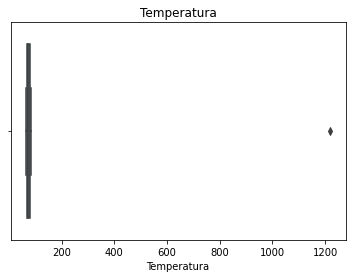

In [22]:
# Busca de outliers para os dados de temperatura:
srn.boxplot(dados['Temperatura']).set_title('Temperatura')

É possível identificar que a coluna 'Temperatura' apresenta um outlier com valor 1200, esse não fazendo sentido físico no contexto dos dados coletados, representando um erro de registro. Esse dado será substituido pela mediana.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umidade')

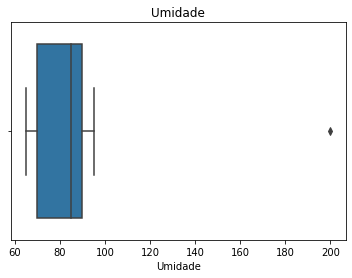

In [24]:
# Busca de outliers para os dados de umidade:
srn.boxplot(dados['Umidade']).set_title('Umidade')

A coluna de umidade apresenta um outlier com valor 200, da mesma forma, não fazendo sentido físico 200% de umidade. Além disso, apresenta um dado NaN. Esses dois dados também serão substituídos pela mediana.

In [42]:
# Identificação de dados inconsistentes no dominio Vento:
vento_agrupado = dados.groupby(['Vento']).size()
print(vento_agrupado)

vento_agrupado.sum()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64


13

Os dados de vento estão agrupados de forma coerente, mas apresenta um valor NaN verificado anteriormente. Esse dado será substituído pela moda para manter a consistência na análise.

In [41]:
# Identificação de dados inconsistentes no dominio Vento:
jogar_agrupado = dados.groupby(['Jogar']).size()
print(jogar_agrupado)

jogar_agrupado.sum()

Jogar
nao    5
sim    9
dtype: int64


14

Os dados para a categoria Jogar são consistentes com o esperado.

# Tratamento dos dados

In [68]:
# Substituiçãp do dado inconsistente de Aparencia pela mediana:
dados.loc[dados['Aparencia'] == 'menos', 'Aparencia'] = 'Sol'

In [ ]:
# Substituiçãp do dado inconsistente de Temperatura pela mediana:
mediana_temp = sts.median(dados['Temperatura'])
mediana_temp

In [ ]:
dados.loc[(dados['Temperatura'] > 130), 'Temperatura'] = mediana_temp
srn.boxplot(dados['Temperatura']).set_title('Temperatura')

Todas as temperatuas agora estão dentro da faixa adequada (-130 ~ 130 F).

In [ ]:
# Substituiçãp do dado inconsistente de Umidade pela mediana:
mediana_umid = sts.median(dados['Umidade'])
mediana_umid

In [ ]:
dados.loc[(dados['Umidade'] > 100), 'Umidade'] = mediana_umid
srn.boxplot(dados['Umidade']).set_title('Umidade')

In [ ]:
# Substituiçãp do dado NaN de Umidade pela mediana:
dados['Umidade'].fillna(mediana_umid, inplace=True)
dados['Umidade'].isnull().sum()

Os dados de umidade agora estão consistentes para análise posterior.

In [ ]:
# Substituiçãp do dado NaN de Vento pela moda:
moda_vent = sts.mode(dados['Vento'])
moda_vent

In [ ]:
dados['Vento'].fillna(moda_vent, inplace=True)
dados['Vento'].isnull().sum()

Dados de Vento consistentes para análise posterior.

# Dados após limpeza

In [ ]:
dados.head(14)